In [50]:
#Importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno


%matplotlib inline

In [61]:
#Reading the dataframe

df=pd.read_csv("Space_Corrected.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [62]:
#Checking the shape of the data

df.shape

(4324, 9)

In [63]:
# Dropping the unnecessary columns

df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
Company Name      4324 non-null object
Location          4324 non-null object
Datum             4324 non-null object
Detail            4324 non-null object
Status Rocket     4324 non-null object
 Rocket           964 non-null object
Status Mission    4324 non-null object
dtypes: object(7)
memory usage: 236.5+ KB


In [72]:
#Setting name of the company as index 

df.set_index("Company Name").head()

,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Company Name,,,,,,
SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [73]:
#Checking for null values 

df.isnull().any()

Company Name      False
Location          False
Datum             False
Detail            False
Status Rocket     False
 Rocket            True
Status Mission    False
dtype: bool

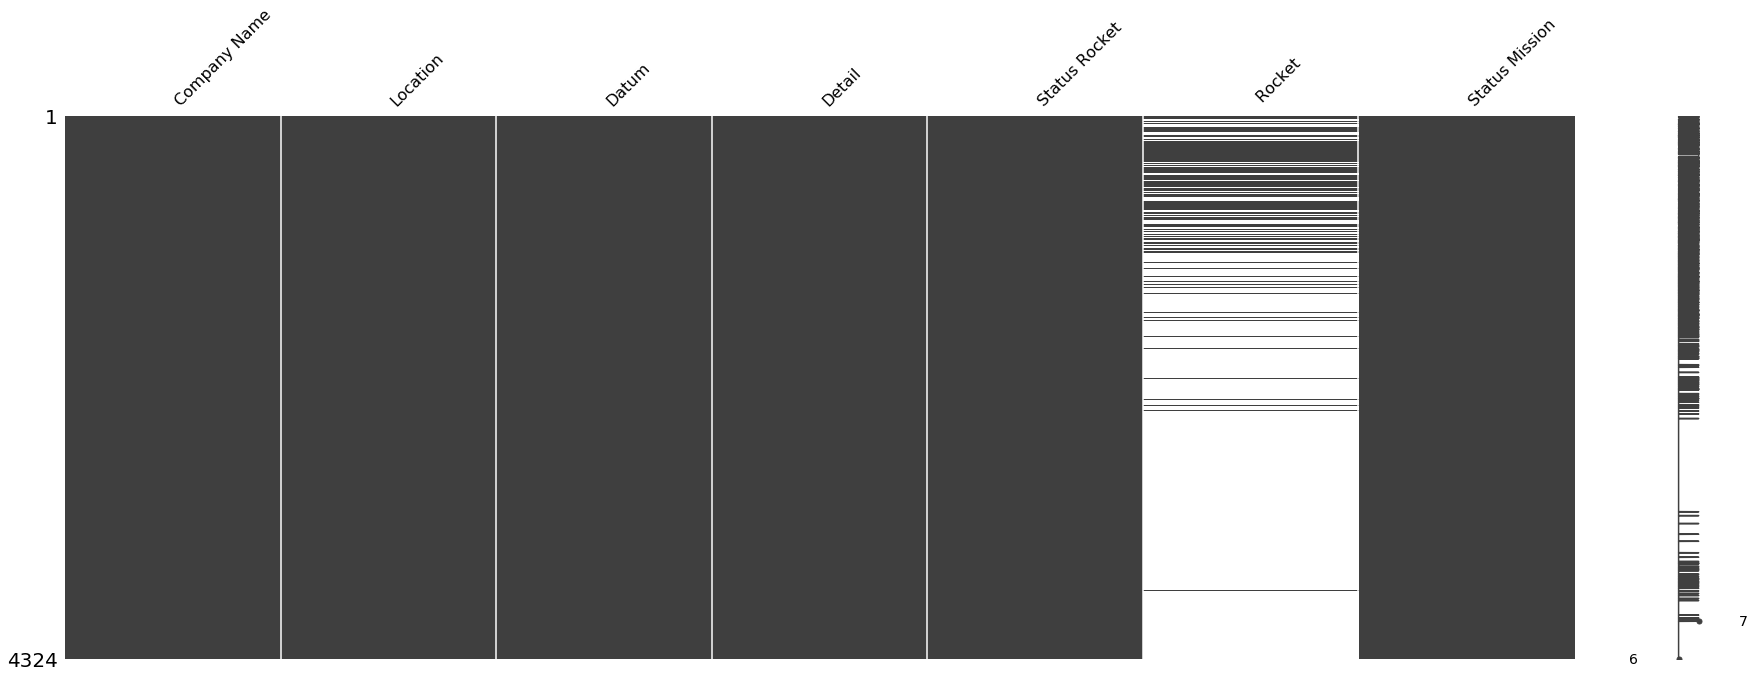

In [74]:
# Missingno library offers a very nice way to visualize the distribution of NaN values

missingno.matrix(df, figsize = (30,10))
plt.show()

### Rocket column has many missing values 

## Status of the Mission

In [75]:
#checking what is the status of the mission 

df['Status Mission'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

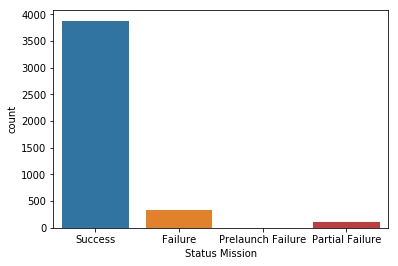

In [76]:
#Plotting the status of the mission using countplot

sns.countplot(df['Status Mission'])
plt.show()

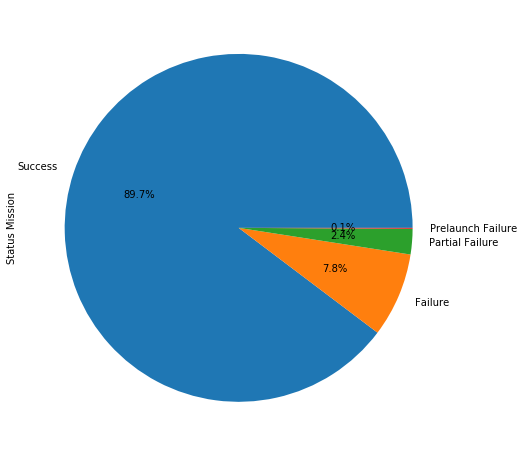

In [80]:
# Using a pie chart to visualize the status of the mission 

df['Status Mission'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.show()

## Companies in the Space Race

In [77]:
# Top Ten companies in Space Race

df['Company Name'].value_counts()[:10]

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Company Name, dtype: int64

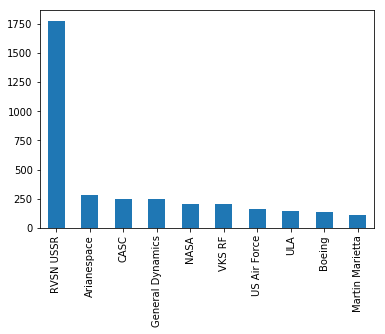

In [84]:
df['Company Name'].value_counts()[:10].plot(kind='bar')
plt.show()

## Present Status of The Rocket

In [85]:
df['Status Rocket'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Status Rocket, dtype: int64

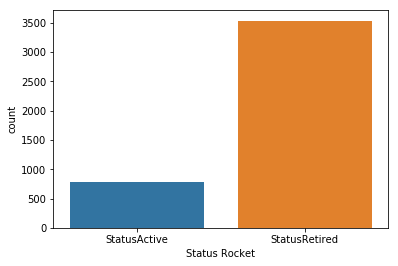

In [86]:
sns.countplot(df['Status Rocket'])
plt.show()

As shown below most of the successed rockets are retired.

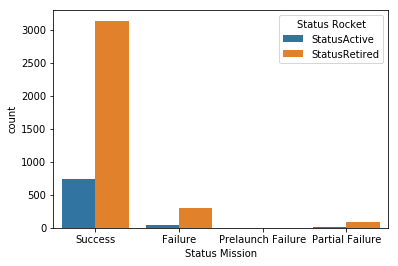

In [89]:
sns.countplot(df['Status Mission'],hue='Status Rocket',data=df)
plt.show()

### Success Rocket Analysis 

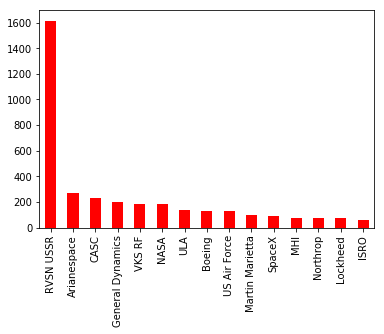

In [92]:
success=df[df['Status Mission']=='Success']
success['Company Name'].value_counts()[:15].plot(kind='bar',color='red')
plt.show()

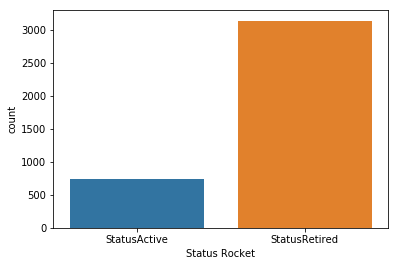

In [94]:
sns.countplot(success['Status Rocket'])
plt.show()

## Failure Rocket Analysis 

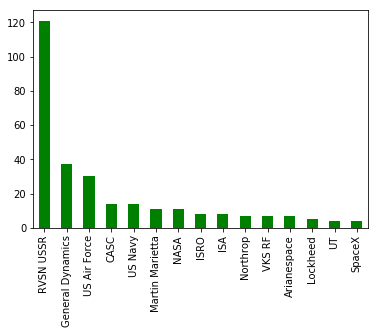

In [97]:
Failure=df[df['Status Mission']=='Failure']
Failure['Company Name'].value_counts()[:15].plot(kind='bar',color='green')
plt.show()

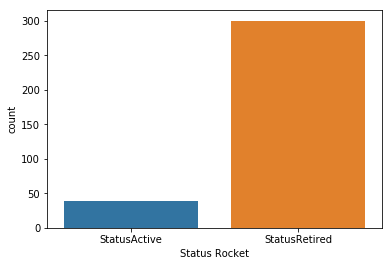

In [99]:
sns.countplot(Failure['Status Rocket'])
plt.show()

## Launch year

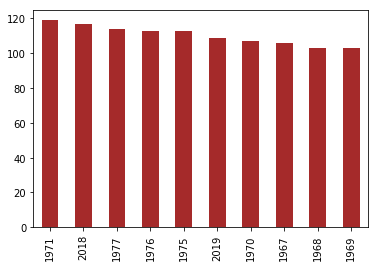

In [101]:
# wrote a function to fetch the year from datum feature then checking the top 10 most rocket launched years,
# as shown below 1917 tops the list.

def get_year(x):
    return x[12:16]
df['Year']=df['Datum'].map(get_year)
df['Year']=df['Year'].astype('int64')
df['Year'].value_counts()[:10].plot(kind='bar',color='brown')
plt.show()

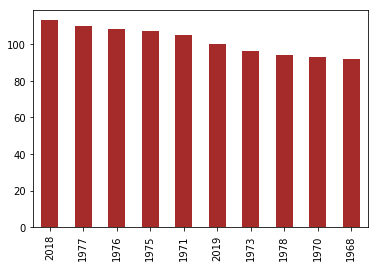

In [104]:
Success=df[df['Status Mission']=='Success']
Success['Year'].value_counts()[:10].plot(kind='bar',color='brown')
plt.show()

## SpaceX analysis

No Of rockets launched by Spacex 100


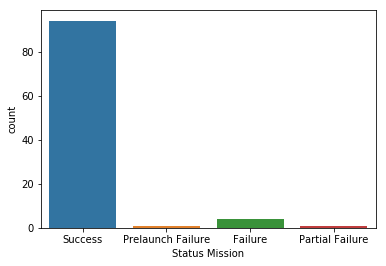

In [107]:
spacex=df[df['Company Name']=='SpaceX']
print("No Of rockets launched by Spacex",spacex.shape[0])
sns.countplot(spacex['Status Mission'])
plt.show()

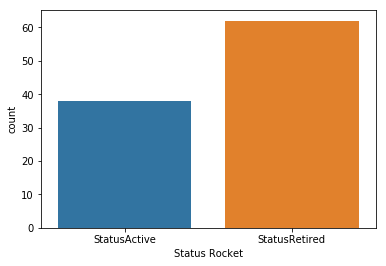

In [109]:
sns.countplot(spacex['Status Rocket'])
plt.show()